In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mdtraj.utils import timing

from msmbuilder.example_datasets import QuadWell
from msmbuilder.msm import BayesianMarkovStateModel
from msmbuilder.msm import ContinuousTimeMSM

In [ ]:
import mdtraj as md
trajs = [md.load('bound_trajs/liganded_1.pdb'), md.load('bound_trajs/liganded_2.pdb'), 
         md.load('bound_trajs/liganded_3.pdb'), md.load('bound_trajs/liganded_4.pdb'), 
         md.load('bound_trajs/liganded_5.pdb'), md.load('bound_trajs/liganded_6.pdb'), 
         md.load('bound_trajs/liganded_7.pdb'), md.load('bound_trajs/liganded_8.pdb'), 
         md.load('bound_trajs/liganded_9.pdb'), md.load('bound_trajs/liganded_10.pdb'), 
         md.load('bound_trajs/liganded_11.pdb'), md.load('bound_trajs/liganded_12.pdb'), 
         md.load('bound_trajs/liganded_13.pdb')] 
top = trajs[0].topology
ref = md.load('bound_trajs/bound.pdb')

In [2]:
from msmbuilder.featurizer import SuperposeFeaturizer
indices = [atom.index for atom in top.atoms if atom.element.symbol in ['C', 'O', 'N']]
featurizer = SuperposeFeaturizer(indices, ref)
sequences = featurizer.transform(trajs)

NameError: name 'top' is not defined

In [1]:
n_states = 25
lag_time = 10
with timing('ContinuousTimeMSM'):
    rates_model = ContinuousTimeMSM(lag_time=lag_time,).fit(seqs)
with timing('BayesianMarkovStateModel'):
    # generating 1000 samples from the distribution, using 2e4 steps between samples
    # to ensure that they're decorrelated
    bayes_model = BayesianMarkovStateModel(lag_time=lag_time, n_samples=int(1e3), n_steps=1e4).fit(seqs)

NameError: name 'NDGrid' is not defined

/usr/local/lib/python2.7/dist-packages/msmbuilder-3.3.0.dev0-py2.7-linux-x86_64.egg/msmbuilder/msm/bayesmsm.py:339: RuntimeWarning: invalid value encountered in log
  timescales = - self.lag_time / np.log(us[:, 1:])


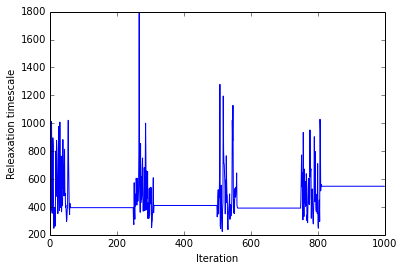

In [6]:
%matplotlib inline
from matplotlib.pyplot import *

plot(bayes_model.all_timescales_[:, 0])
xlabel('Iteration')
ylabel('Releaxation timescale')

In [ ]:
figure(figsize=(14,4))
grid(False)

# SUBPLOT 1. ContinuousTimeMSM
subplot(1,3,1, axisbg='white')
# the mean and 2-std error bars in the populations
rates_mean = rates_model.populations_
rates_err = 2*rates_model.uncertainty_pi()
print np.arange(n_states)
print len(rates_mean)
print len(rates_err)
# errorbar(x=np.arange(n_states), y=rates_mean, yerr=rates_err, color='b')
# fill_between(x=np.arange(n_states), y1=rates_mean+rates_err, y2=rates_mean-rates_err, color='b', alpha=0.2)
# title('MLE continuous-time MSM')
# xlabel('States')
# ylabel('Populations')

# SUBPLOT 2. ContinuousTimeMSM
subplot(1,3,2, axisbg='white')
# the mean and 2-std error bars in the populations, from
# averaging over the MCMC samples
bayes_mean = np.mean(bayes_model.all_populations_, axis=0)
bayes_err = 2*np.std(bayes_model.all_populations_, axis=0)
print len(bayes_mean)
print len(bayes_err)
print bayes_err
errorbar(x=np.arange(n_states), y=bayes_mean, yerr=bayes_err, c='r')
fill_between(x=np.arange(n_states), y1=bayes_mean+bayes_err, y2=bayes_mean-bayes_err, color='r', alpha=0.2)
title('Bayesian discrete-time MSM (MCMC)')
xlabel('States')
ylabel('Populations')

# SUBPLOT3. Potential energy
subplot(1,3,3, axisbg='white')
title('Potential energy surface')
xlabel('Position')
ylabel('Potential')
# the potential function
potential_x = np.linspace(-1, 1, 200)
V = quadwell.potential(potential_x)
plot(potential_x, V, 'k')

tight_layout()